<a href="https://colab.research.google.com/github/sheinviktoriia/ML-course-tasks/blob/main/HW_2_1_Feature_Analysis_for_Constructing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('/medical-charges.csv')

In [8]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Дослідити чи є в даних якісь аномалії, і визначити, чи брати такі дані для аналізу.
2. Визначити чи є кореляція між змінними по відношенню до таргет змінної.
3. Дослідити колонки, в яких є позитивна кореляція і знайти можливі взаємозалежності між такими колонками.
4. На основі висновків з аназізу, визначити ряд умов, які мають вплив на таргет змінну.
5. Потестувати ці гіпотези і зробити висновки щодо того, які умови мають значний вплив і можуть бути використані для прогнозування.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [10]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['orange', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show();

В середньому чоловіки і жінки одинаково платять за страховку. Проте, більше чоловіків обирають дорожчий поліс страхування, в той час як жінки обирають поліс в межах 4,883 - 14,556 у.о. Максимальна ціна полісу у чоловіків (не враховуючи аномалії) - 40,273 у.о., тоді як у жінок - 28,476 у.о.

In [11]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'orange', 'blue', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show();

Найбільше медіанне значення вартості страховки в регіоні northeast, хоча в регіоні southeast більше людей користуються страховкою більшої вартості. Найнижчий показник у районі southwest. Загалом, на заході вартість страховки нижча.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [12]:
color_map = {
    'southwest': 'red',
    'southeast': 'orange',
    'northwest': 'blue',
    'northeast': 'green'
}

px.histogram(df, x='smoker', color='region', title='Smoker', color_discrete_map=color_map)

Кількість курців в регіоні southeast і northeast дуже відрізняється від інших регіонів. Отже, враховуючи результати попередніх обчислень, можемо припустити, що куріння впливає на вартість страхового збору.

In [13]:
px.histogram(df, x='smoker', color='children', title='Smoker')

Серед курців майже половина - це особи без дітей, а ще 20% - батьки однієї дитини.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [14]:
fig = px.violin(df,
          x='children',
          y='charges',
          color='smoker',
          hover_data=['sex'],
          title='Children vs. Charges')
fig.show();

Мінімальна сума страховки для курців більша, ніж для тих, хто не курить, незалежно від того, чи має особа дітей. Найбільша сума страховки у курців, які мають 1, 3 дітей, або не мають дітей взагалі. Цікаво, що курців, у яких 5 дітей, майже немає, а сума страховки для таких осіб одинакова. Загалом, медіна суми страховки для обіс з дітьми майже не відрізняється, окрім категорії осіб, які мають 5 дітей. Можливо, це пов"язано з тим, що такі особи мають вже повнолітніх дітей, адже ми не знаємо, чи в наборі даних враховані неповнолитні діти, що проживають на разом, чи загалом кількість дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [17]:
non_smoker_df = df[df.smoker == 'no']

In [18]:
def estimate_charges(age, w, b):
    return w * age + b

In [22]:
def try_parameters(w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

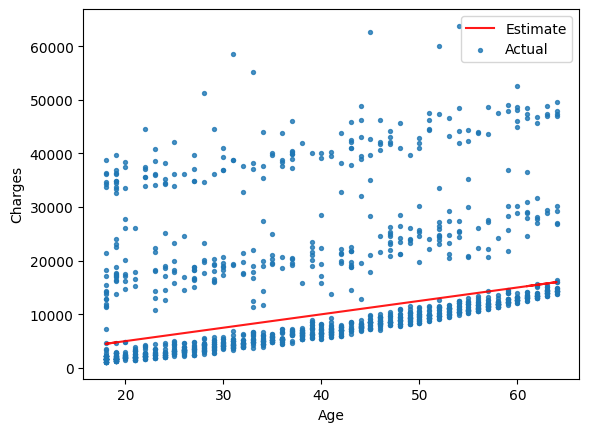

In [24]:
try_parameters(250, 0)

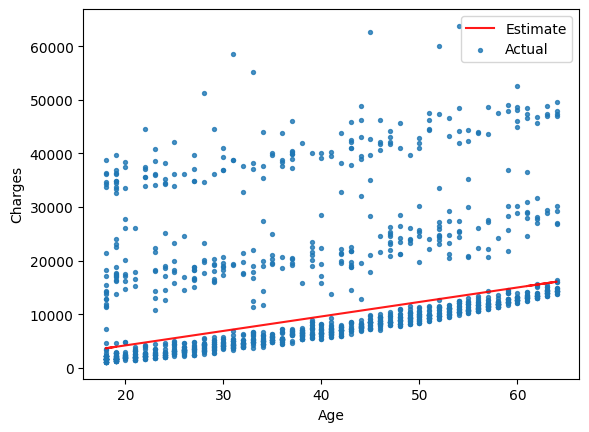

In [25]:
try_parameters(270, -1200)

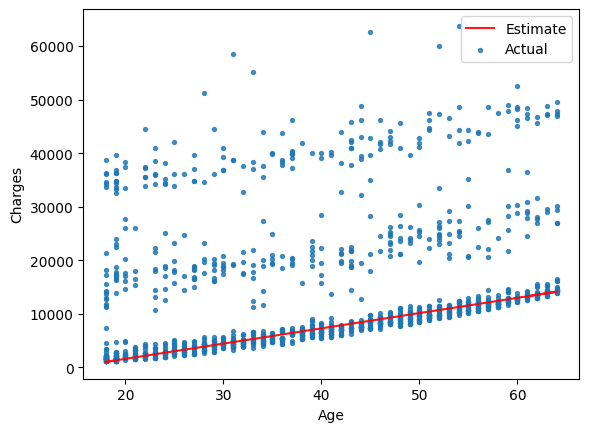

In [26]:
try_parameters(285, -4100)

Для того, щоб підігнати лінію під фактичні дані, значення b має бути від'ємним. Припускаю, що ми не зможемо знайти RMSE наближене до нуля через велику кількість викидів, тоді як лінію ми будуємо для загальної тенденції.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [27]:
def rmse(targets, age, ws, bs):
    results = []
    for w in ws:
        for b in bs:
            predictions = estimate_charges(age, w, b)
            rmse = np.sqrt(np.mean(np.square(targets - predictions)))
            results.append({'w': w, 'b': b, 'rmse': rmse})
    return results

targets = non_smoker_df['charges']
age = non_smoker_df.age
ws = [250, 270, 285]
bs = [0, -1200, -4100]

results = rmse(targets, age, ws, bs)
for res in results:
    print(res)

{'w': 250, 'b': 0, 'rmse': np.float64(4877.688755717927)}
{'w': 250, 'b': -1200, 'rmse': np.float64(4673.637609506453)}
{'w': 250, 'b': -4100, 'rmse': np.float64(5387.290973305175)}
{'w': 270, 'b': 0, 'rmse': np.float64(5155.527253325232)}
{'w': 270, 'b': -1200, 'rmse': np.float64(4768.6482284305475)}
{'w': 270, 'b': -4100, 'rmse': np.float64(5035.00965286619)}
{'w': 285, 'b': 0, 'rmse': np.float64(5439.539133056678)}
{'w': 285, 'b': -1200, 'rmse': np.float64(4932.67254805531)}
{'w': 285, 'b': -4100, 'rmse': np.float64(4849.335037733539)}


Найнижча помилка, якої вдалось досягти - 4673 з парою значень w = 250, b = -1200. Теоретично, можна спробувати підставляти рандомні значення в циклі, прописавши умову: якщо rmse в циклі більше, ніж в попередньому, то значення не повертати, в іншому випадку - повертати. Так ми можемо отримати тільки релевантні дані для аналізу і зменшити кількість даних, що повертаються.